In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 47.0 MB/s 
     |████████████████████████████████| 15.4 MB 33.3 MB/s 


In [2]:
%matplotlib inline

import pandas as pd
import geopandas

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
!pip install contextily

     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [5]:
import contextily as ctx

**1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia**

In [6]:
regioni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf").to_crs(epsg = 3857)
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((940622.942 5854658.550, 941958.480 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((844755.963 5775663.263, 844893.962 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((981438.909 5625033.644, 981200..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((1358666.935 5956209.526, 1358841.301..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((1392151.013 5889736.446, 1392164.766..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((1533468.183 5718178.568, 15334..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((1096643.374 5469063.377, 10966..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((1166717.621 5494813.378, 11667..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((1237283.608 5199871.704, 12374..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((1383833.946 5402420.627, 13837..."


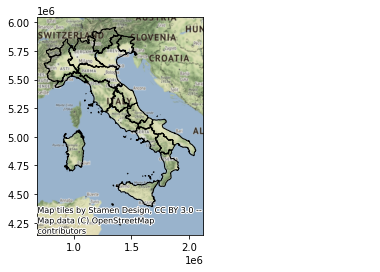

In [17]:
regioni = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf')
ax = regioni.to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')
ctx.add_basemap(ax)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa**

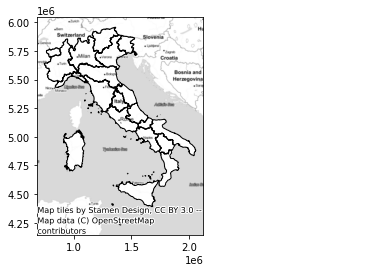

In [19]:
ax = regioni.to_crs(epsg=3857).plot(edgecolor='k',facecolor='none')

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)   #cambiare mappa

**3. visualizzare le province della Lombardia su una mappa di contextily**

In [20]:
province = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf')
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


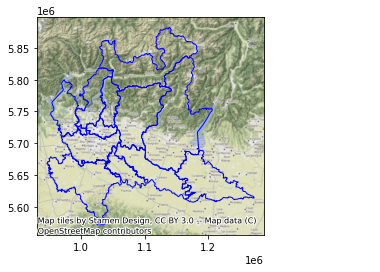

In [22]:
ax = province[province.within(regioni[regioni.DEN_REG=='Lombardia'].geometry.squeeze())].to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

In [ ]:
Lombardia.geometry.squeeze()   

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]
ProvLom

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]   #within necessita di un oggetto geometrico e per convertire un oggetto da geografico a geometrico si usa geometry.squeeze()
ProvLom.plot()

In [ ]:
ProvLom = Prov[Prov.within(Lombardia.geometry.squeeze())]   #within necessita di un oggetto geometrico e per convertire un oggetto da geografico a geometrico si usa geometry.squeeze()

ax = Prov[Prov.within(Lombardia.geometry.squeeze())].to_crs(epsg = 3857).plot()

ctx.add_basemap(ax)

**4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti**

In [24]:
provincia_milano = province[province.DEN_UTS=='Milano']
provincia_milano

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."


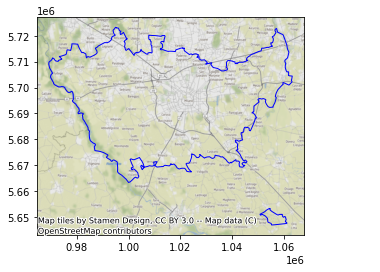

In [25]:
ax = provincia_milano.to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

In [ ]:
Comuni = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf").to_crs(epsg = 3857)
Comuni

In [ ]:
Milano = Comuni[Comuni.COMUNE == 'Milano']
Milano

In [ ]:
ax = ProvLom[ProvLom.DEN_CM == 'Milano'].to_crs(epsg = 3857).to_crs(epsg = 3857).plot(edgecolor = 'k',color ='none')

Milano.plot(ax = ax)
ctx.add_basemap(ax)

**5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri.**

In [28]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf')
Quartieri

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


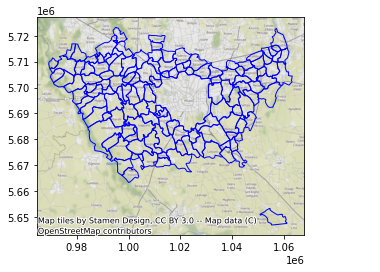

In [31]:
ax = quartieri_milano = Quartieri[Quartieri.within(provincia_milano.geometry.squeeze())].to_crs(epsg=3857).plot(edgecolor='b',facecolor='none')
ctx.add_basemap(ax)